In [14]:
#Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline 
# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV # for hyperparameter tuning
#import optuna as optuna # for hyperparameter tuning
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
# tree-based algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#import shape # for model interpretability
import sys
sys.path.append('../../src')
from EvaluateRegression import evaluate_regression
from PreprocessingFunction import build_preprocessor
import shap

In [2]:
# Load dataset
df = pd.read_csv("../../data/X_train_preprocessed.csv")

In [3]:
# Define features and target
target = "PrimeCommerciale"
X = df.drop(columns=[target])
y = df[target]

---
Preprocessing
---

In [4]:
preprocessor = build_preprocessor(X)

---
Train Model
---

In [5]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
# ===========================
# Linear Regression Model
# ===========================
lin_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("=== Linear Regression ===")
evaluate_regression(y_test, y_pred_lr)


# ===========================
# Ridge Regression Model
# ===========================
ridge = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n=== Ridge Regression ===")
evaluate_regression(y_test, y_pred_ridge)


# ===========================
# Lasso Regression Model
# ===========================
lasso = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Lasso(alpha=0.01))
])

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\n=== Lasso Regression ===")
evaluate_regression(y_test, y_pred_lasso)


# ===========================
# Random Forest Regressor
# ===========================
rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Regressor ===")
evaluate_regression(y_test, y_pred_rf)


# ===========================
# XGBoost Regressor
# ===========================
xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost Regressor ===")
evaluate_regression(y_test, y_pred_xgb)

=== Linear Regression ===
RMSE: 131.3344, R2: 0.6318

=== Ridge Regression ===
RMSE: 131.2989, R2: 0.6320

=== Lasso Regression ===
RMSE: 131.3005, R2: 0.6320

=== Random Forest Regressor ===
RMSE: 114.9590, R2: 0.7179

=== XGBoost Regressor ===
RMSE: 108.5979, R2: 0.7482


# XAI Explainability

---
Feature importance - XGBoost
---

In [7]:
# Récupération du modèle XGBoost depuis le pipeline
xgb_model = xgb.named_steps['model']

# Importances des features
importances = xgb_model.feature_importances_

# Récupération des noms de features après preprocessing
feature_names = xgb.named_steps['preprocess'].get_feature_names_out()

# DataFrame des importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Tri par importance décroissante
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance_df


,Feature,Importance
9,cat__ClasseVehicule_Cheap,0.177480
2,num__AgeVehicule,0.082799
1,num__BonusMalus,0.059946
10,cat__ClasseVehicule_Expensive,0.051480
27,cat__PuissanceVehicule_P8,0.042767
14,cat__PuissanceVehicule_P10,0.038222
28,cat__PuissanceVehicule_P9,0.036187
16,cat__PuissanceVehicule_P12,0.032687
5,cat__FrequencePaiement_Annual,0.032661
17,cat__PuissanceVehicule_P13,0.032266


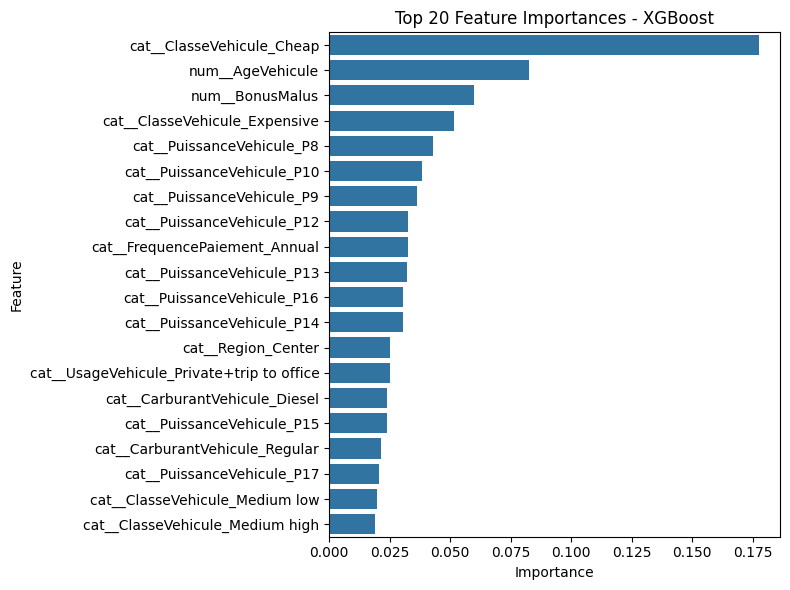

In [8]:
top_k = 20
top_features = feature_importance_df.head(top_k)

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features
)
plt.title(f'Top {top_k} Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


---
SHAP
---

In [9]:
# SHAP Feature Importance for XGBoost with Pipeline
# Extract the preprocessor and model from the pipeline
preprocessor_xgb = xgb.named_steps['preprocess']
xgb_model = xgb.named_steps['model']

# Preprocess the test data
X_test_preprocessed = preprocessor_xgb.transform(X_test)

# Create SHAP explainer with the raw XGBoost model (not the pipeline)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)

In [10]:
#define num_var and cat_var for feature names extraction
num_var = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_var = X.select_dtypes(include=['object', 'category']).columns.tolist()

#  Get feature names after preprocessing
feature_names = (
    list(preprocessor_xgb.named_transformers_['num'].get_feature_names_out(num_var)) +
    list(preprocessor_xgb.named_transformers_['cat'].get_feature_names_out(cat_var))
)

print(f"Total features after preprocessing: {len(feature_names)}")

Total features after preprocessing: 41


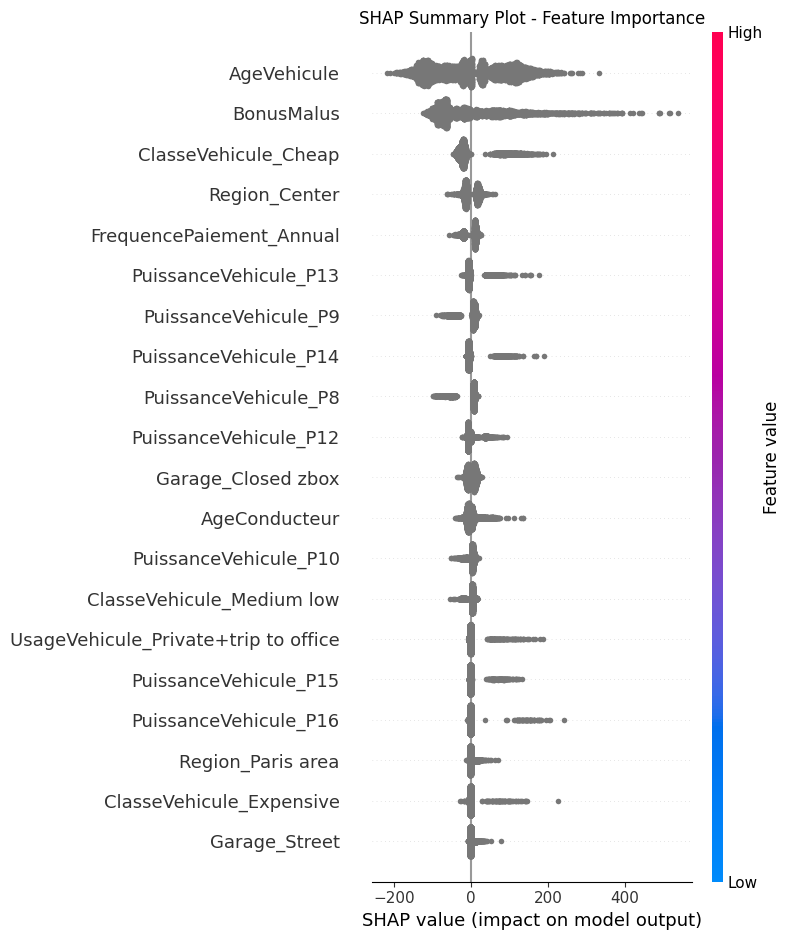

In [11]:
# SHAP summary plots
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - Feature Importance")
plt.tight_layout()
plt.show()

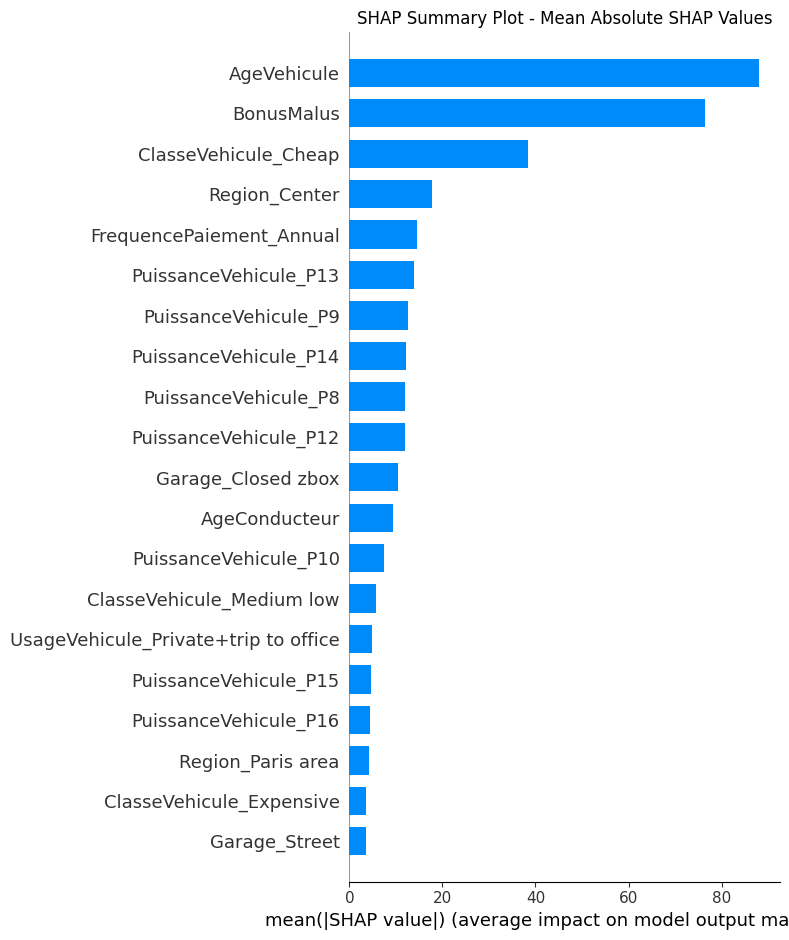

In [12]:
# Bar plot 
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - Mean Absolute SHAP Values")
plt.tight_layout()
plt.show()


---
Dalex
---

In [ ]:
import dalex as dx

# Création d'un explainer 
explainer_dalex = dx.Explainer(
    xgb, 
    X_test, 
    y_test, 
    label="XGBoost Churn",
    verbose=False
)

# Performance du modèle
explainer_dalex.model_performance().plot()

# Importance des variables
explainer_dalex.model_parts().plot()

# Breakdown 
explainer_dalex.predict_parts(X_test.iloc[0]).plot()

c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\dalex\_global_checks.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio